In [1]:
import numpy             as np
import matplotlib.pyplot as plt
from matplotlib          import rc 
from matplotlib          import cm
from scipy.optimize      import curve_fit
import os
from scipy               import integrate
import math
from mpl_toolkits.mplot3d import Axes3D

import time
from tqdm import tqdm

from progress.bar import Bar, ChargingBar

from MyRandom import *
# %matplotlib notebook

In [2]:
def FillPoints(seed_, method_, Npoints):
    
    rand = MyRandom(seed = seed_, method = method_)
    points = np.zeros(Npoints)
    
   # bar1 = Bar('Procesando:', fill='.', max=Npoints)
   # bar2 = ChargingBar('Procesando:', max=Npoints)
    
    for i in tqdm(range(Npoints)):
        points[i] = rand.Random() 
        #time.sleep(np.random.uniform(0, 0.2))
    ##    bar1.next()
    ##    bar2.next()
    
    ##bar1.finish()
    ##bar2.finish()
    
    return points

In [3]:
Npoints = 1000

Nsimple = FillPoints(132, "simple",  Npoints)
Nrand48 = FillPoints(10, "drand48", Npoints)

100%|██████████| 1000/1000 [00:00<00:00, 198059.40it/s]


In [4]:
indices = np.arange(Npoints)
Even = (indices%2) == 0

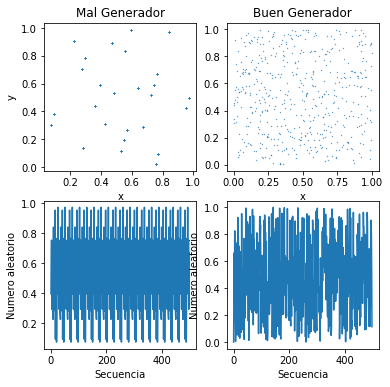

In [5]:
fig = plt.figure( figsize=(6,6))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.scatter(Nsimple[Even], Nsimple[~Even], s=0.1)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.title.set_text('Mal Generador')

ax3.plot(Nsimple[Even])
ax3.set_xlabel('Secuencia')
ax3.set_ylabel('Numero aleatorio')


ax2.scatter(Nrand48[Even], Nrand48[~Even], s=0.1)
ax2.set_xlabel('x')
#ax2.set_ylabel('y')
ax2.title.set_text('Buen Generador')

ax4.plot(Nrand48[Even])
ax4.set_xlabel('Secuencia')
ax4.set_ylabel('Numero aleatorio')


plt.show()

In [6]:
rand = MyRandom(seed = 136, method = 'drand48')

moments = []

points = np.linspace(0, 1e6, 11)

#pbar = tqdm(total=4)

for k in tqdm(range(4)):
    #time.sleep(0.5)
    #pbar.update(4)
    #print("Testing for moment: ", k+1)
    test = []
    for i in range(len(points)):
        test.append(rand.TestMethod(int(points[i]),k+1, 45, 'simple'))
    moments.append(test)
    
#pbar.close()

  0%|          | 0/4 [00:00<?, ?it/s]/home/alejandro/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/alejandro/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 4/4 [00:19<00:00,  4.86s/it]


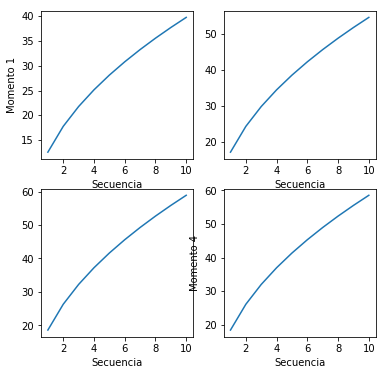

In [7]:
fig = plt.figure( figsize=(6,6))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(moments[0])
ax1.set_xlabel('Secuencia')
ax1.set_ylabel('Momento 1')

ax2.plot(moments[1])
ax2.set_xlabel('Secuencia')
#ax2.set_ylabel('Momento 2')

ax3.plot(moments[2])
ax3.set_xlabel('Secuencia')
#ax3.set_ylabel('Momento 3')

ax4.plot(moments[3])
ax4.set_xlabel('Secuencia')
ax4.set_ylabel('Momento 4')


plt.show()

In [9]:
Npoints = 100000
Nsimple = FillPoints(132, "simple",  Npoints)
Nrand48 = FillPoints(10, "drand48", Npoints)

100%|██████████| 100000/100000 [00:00<00:00, 423665.79it/s]


# Punto 1

In [10]:
def ckfunction(vector, Npoints_, moment):

    ck = []

    for k in range(moment):
        k += 1
        sum = 0.

        for i in range(len(vector[:-k])):
            sum += vector[i]*vector[i+k]
    
        ck.append(sum/(Npoints_-1))
    
    return ck

In [11]:
ck = ckfunction(Nsimple, Npoints, 20)
ck1 = ckfunction(Nrand48, Npoints, 20)
print(ck, ck1)

([0.2664883245485455, 0.2508833159531299, 0.27156101835138236, 0.2740975357065868, 0.26901410288579475, 0.25449704892202807, 0.2748200642561218, 0.2795291131266737, 0.27444539835216764, 0.2577574070507308, 0.27843577873312064, 0.2820581987237037, 0.24795515780012342, 0.2628258010597469, 0.2784293815171071, 0.2769772281559768, 0.27443043729121647, 0.2602789590730404, 0.2747843583810997, 0.2929228580288381], [0.25053416669228806, 0.25007866314197263, 0.25084341693376355, 0.2509697324364561, 0.2502522391648518, 0.25033893305485616, 0.2507414362682248, 0.25060654935066723, 0.2503292247648739, 0.2503762222031798, 0.25082405899397403, 0.2502050854172476, 0.2504085152710642, 0.25050352109301466, 0.2506388065882259, 0.25065515808173644, 0.2508652188303223, 0.25089576133581415, 0.25043951518691404, 0.250727415162007])


Text(0.5,0,'Momento k-esimo, drand48')

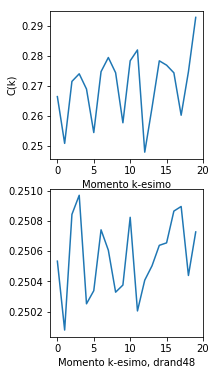

In [12]:
fig = plt.figure( figsize=(6,6))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,3)

ax1.plot(ck)
ax1.set_xlabel('Momento k-esimo')
ax1.set_ylabel('C(k)')

ax2.plot(ck1)
ax2.set_xlabel('Momento k-esimo, drand48')
#ax2.set_ylabel('')

# Punto 2

In [13]:
def CreateSphere(Npoints, R):
    
    X = []
    Y = []
    Z = []
    
    for i in range(Npoints):
        
        phi = np.random.uniform(0., 2*np.pi) 
        costheta = np.random.uniform(-1.,1.)
        theta = np.arccos(costheta)
        u = np.random.rand()
        r = R* u**(1./3.)
        
        X = np.append(X, r*np.cos(phi)*np.sin(theta))
        Y = np.append(Y, r*np.sin(phi)*np.sin(theta))
        Z = np.append(Z, r*np.cos(theta))
    
    return X, Y, Z
     
Radio = 1.0    
data_sphere = CreateSphere(10000, Radio)
data_sphere = np.array(data_sphere)
#print(data_sphere, data_sphere[0])

In [14]:
data = np.random.rand(300, 3)

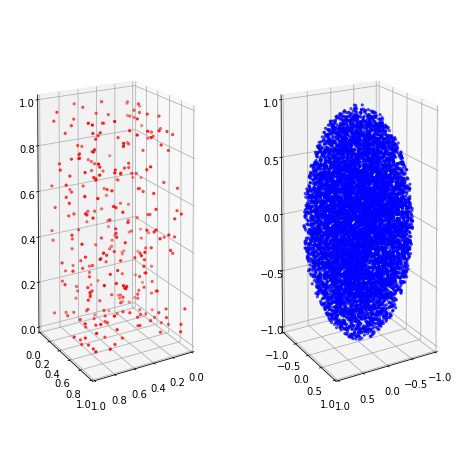

In [15]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,2,1, projection = '3d')
ax1 = fig.add_subplot(1,2,2, projection = '3d')


#configurar límites de los ejes
ax.set_xlim3d(0, 1)
ax.set_ylim3d(0, 1)
ax.set_zlim3d(0, 1)

ax1.set_xlim3d(-Radio, Radio)
ax1.set_ylim3d(-Radio, Radio)
ax1.set_zlim3d(-Radio, Radio)

ax.view_init(10, 60)
ax1.view_init(10, 60)


ax.scatter(data[:,0], data[:,1], data[:,2], color='r', marker='.')
ax1.scatter(data_sphere[0], data_sphere[1], data_sphere[2], color='b', marker='.')

plt.savefig('3dPoints.pdf')
plt.show()

In [20]:
Npoints = 20000
data_sphere = CreateSphere(Npoints, 2.0)
data_sphere = np.array(data_sphere)
print(data_sphere)

[[ 1.04401753 -0.62977803  1.01899774 ...  0.08103611  0.37271783
  -1.72262789]
 [-0.23904655 -0.03826766 -0.49578085 ... -1.03308341  1.25881667
  -0.66156443]
 [ 0.68519718 -1.84298805 -0.24467415 ... -0.57865867  0.032678
   0.5614853 ]]


# Integración en esféricas

In [21]:
def FunctionI(x,y,z):
    return np.exp( np.sqrt(x**2+y**2+z**2) )

In [22]:
def FunctionE(r,theta):
    return np.exp(r)*r**2 * np.pi * np.sin(theta*np.pi)


def Generate():

    vec = np.random.rand(1000000)
    theta = np.random.rand(1000000)

    func = FunctionE(vec,theta)

    integral = np.average(func)

    #print(integral*2*np.pi)
    return integral*2*np.pi

vector_int = []
vector_int = np.array(vector_int)
for i in range(100):
    vector_int = np.append(vector_int,Generate())

print(np.average(vector_int))

9.026299120564778


In [18]:
def CalculateIntegral(data, Npoints, R):
    
    integral = 0.

    #FunctionVector = FunctionI(data1[:,0],data1[:,1],data1[:,2])
    FunctionVector = FunctionI(data[0],data[1],data[2])
    #print(FunctionVector)
    
    #integral = np.average(FunctionVector)
    
    for i in range(Npoints):
       #print(data[0][i],data[1][i],data[2][i])
        integral += FunctionI(data[0][i],data[1][i],data[2][i])
        
    integral = integral/Npoints
    norm_factor = (4.*np.pi)*(R**3)/(3) 
                          
    return integral*(norm_factor)

In [23]:
integral = CalculateIntegral(data_sphere, Npoints, 2.0)
r = 2.0
integral_real = 4.*np.pi*(np.exp(r)*( r**2-2*r+2  ) -2.0)
print(integral, integral_real, integral_real/integral)

(160.10649482134355, 160.57449363018875, 1.0029230469967345)


# Punto de integración N-dimensional

In [24]:
def f(r):
    return np.cos(r)

def g(r):
    return np.exp(-r**2)    

def norm_gaussian(d=2, sigma=1.0):
    return np.sqrt((2.0*np.pi*sigma**2)**d)

def metropolis_hastings_D(f, N=100000, delta=1.0, d=2):
    x = np.zeros((N, d))
    for i in range(1,N):
        x[i,:] = x[i-1,:] + (np.random.random(d)-0.5)*delta

        future = f(np.sqrt(np.sum(x[i,:]**2)))
        present = f(np.sqrt(np.sum(x[i-1,:]**2)))

        r = np.minimum(1.0, future/present)
        g = np.random.random()

        if g < r:
            x[i,:] = x[i,:]
        else:
            x[i,:] = x[i-1,:]
    return x

def mc_integral_D(f, g, d=2):
    x = metropolis_hastings_D(g, d=d)    
    r = np.sqrt(np.sum(x*x, axis=1))
    average = np.average(f(r)) 
    norm = norm_gaussian(d=d, sigma = 1/np.sqrt(2))
    plt.plot(x[:,0], x[:,1])
    plt.savefig('cadena2 dimensiones.pdf')
    return average * norm

1.8106995125080048


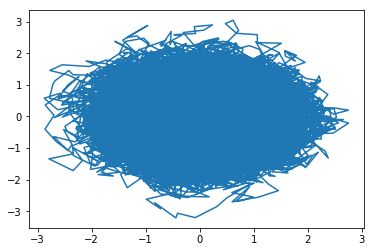

In [25]:
d=2
print(mc_integral_D(f, g, d=d))

# Metropolis Hastings 

parametros de la ecuación $f(x) = 2x^{2} - 0.5x +4.4$

# Maxima Verosimilitud

(array([1., 0., 0., 2., 0., 1., 3., 0., 1., 2.]),
 array([-5.84192597, -4.5755447 , -3.30916343, -2.04278216, -0.77640089,
         0.48998039,  1.75636166,  3.02274293,  4.2891242 ,  5.55550548,
         6.82188675]),
 <a list of 10 Patch objects>)

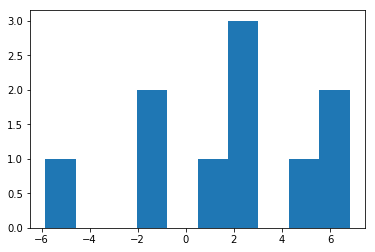

In [26]:
Data = np.loadtxt('data/dataMLikelihood.dat')
plt.hist(Data)

In [27]:
def LogProb(x, mu, sigma):
    l =  ( 1./np.sqrt(2.* np.pi * sigma**2) )*np.exp( -0.5*((x - mu)/sigma)**2 )
    return np.log(l)

In [28]:
def LogLikelihood(x, Npoints=30):
    a = np.linspace(-1, 4, Npoints)
    b = np.linspace(1, 7, Npoints)
    MU, SIGMA = np.meshgrid(a, b)
    
    likelihood = np.zeros( (Npoints, Npoints) )
    
    for i in x:
        likelihood = likelihood + LogProb(i, MU, SIGMA)
        
    return MU, SIGMA, likelihood

In [29]:
MU, SIGMA, Likelihood = LogLikelihood(Data, 100)

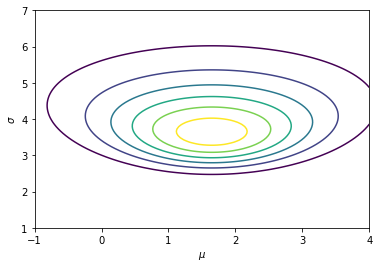

In [30]:
plt.contour(MU, SIGMA, np.exp(Likelihood-Likelihood.max()))
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\sigma$")
plt.savefig('LikelihoodContour.pdf')